<a href="https://colab.research.google.com/github/Code-Abbey/Machine-Learning-With-Python-Excersise/blob/main/group_8_excercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: Exploring Car Data with Linear and Polynomial Regression

In this assignment, you will delve into the world of regression analysis using Python, Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn. Your task is to analyze the provided car data, applying both linear and polynomial regression techniques.

### Dataset:
- **Source:** https://raw.githubusercontent.com/schauppi/Intro_ML/main/datasets/car_data.csv
- **Columns of Interest:** "Age", "Selling_Price", "Present_Price", "Kms_Driven"

### Steps:

1. **Explore the Data with Pandas**:
   - Load the car data into a Pandas DataFrame.
   - Display the first few rows of the dataset.
   - Check for any missing values.

2. **Select Relevant Columns**:
   - Subset the DataFrame to include only "Age", "Selling_Price", "Present_Price", and "Kms_Driven".

3. **Plot Distributions for Each Value**:
   - Use Matplotlib to visualize the distribution of each selected column.

4. **Compute and Plot Correlations Matrix**:
   - Calculate the correlation matrix using Pandas.
   - Visualize the matrix with Seaborn to identify highly correlated features.

5. **Train and Evaluate Linear Regression Model with All Features**:
   - Split data into X (features) and y (target: Selling_Price).
   - Perform train-test split using Scikit-learn.
   - Scale the data with StandardScaler.
   - Train a Linear Regression model and evaluate it using MAE, MSE, RMSE, and R2.

6. **Train and Evaluate with Highly Correlated Features**:
   - Identify and select highly correlated features from the correlation matrix.
   - Repeat the process of scaling, training a Linear Regression model, and evaluation as in Step 5.

7. **Train and Evaluate Polynomial Regression Model with Highly Correlated Features**:
   - Using the highly correlated features, train a Polynomial Regression model.
   - Evaluate the Polynomial Regression model using the same metrics as before.

8. **Bonus**:
  - Unleash Your Inner ML Wizard! Optimize the model even more by conjuring up additional polynomial features or summoning other correlated features ( Warning: excessive model boosting may lead to unparalleled bragging rights, +5 bonus points, and our eternal admiration )

9. **Submit Your Notebook**:
   - Ensure all steps are completed within the provided Jupyter notebook.
   - Submit your notebook file (.ipynb) named: `group_X_excercise_X.ipynb`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1. Explore the Data with Pandas

We use `pd.read_csv()`, `data.head()`, and data.`isnull().sum()` to load a car dataset from a remote URL into a Pandas DataFrame, preview the first few rows, and check for missing values, respectively.

In [3]:
# Load the car data
data = pd.read_csv("https://raw.githubusercontent.com/schauppi/Intro_ML/main/datasets/car_data.csv")

In [4]:
# Display the 5 five rows
data.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1


In [5]:
# Check for missing values
data.isnull().sum()

,0
Age,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Owner,0
Fuel_Type_Diesel,0
Fuel_Type_Petrol,0
Seller_Type_Individual,0
Transmission_Manual,0


In [6]:
#Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     299 non-null    int64  
 1   Selling_Price           299 non-null    float64
 2   Present_Price           299 non-null    float64
 3   Kms_Driven              299 non-null    int64  
 4   Owner                   299 non-null    int64  
 5   Fuel_Type_Diesel        299 non-null    int64  
 6   Fuel_Type_Petrol        299 non-null    int64  
 7   Seller_Type_Individual  299 non-null    int64  
 8   Transmission_Manual     299 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.2 KB


In [7]:
#Number of rows and columns
data.shape

(299, 9)

In [8]:
# Column names
data.columns.tolist()

['Age',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual']

In [9]:
# Summary statistics for all numeric columns
data.describe()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,5.341137,4.574849,7.368060,35261.234114,0.043478,0.197324,0.795987,0.351171,0.869565
std,2.875028,4.779588,7.124316,28183.470787,0.248720,0.398646,0.403654,0.478136,0.337346
min,1.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.900000,1.230000,15000.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,5.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,7.000000,6.000000,9.875000,47500.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,16.000000,33.000000,36.230000,213000.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Data types
data.dtypes

,0
Age,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Owner,int64
Fuel_Type_Diesel,int64
Fuel_Type_Petrol,int64
Seller_Type_Individual,int64
Transmission_Manual,int64


### 2. Select Relevant Columns

The code uses `data[selected_cols]` and `data_selected.head()` to select specified columns (Age, Selling_Price, Present_Price, Kms_Driven) from the DataFrame and display the first five rows of the resulting subset, respectively.

In [11]:
# Subset the DataFrame
selected_cols = ["Age", "Selling_Price", "Present_Price", "Kms_Driven"]
data_selected = data[selected_cols]

In [12]:
# Plot the first five rows
data_selected.head()

,Age,Selling_Price,Present_Price,Kms_Driven
0,5,3.35,5.59,27000
1,6,4.75,9.54,43000
2,2,7.25,9.85,6900
3,8,2.85,4.15,5200
4,5,4.60,6.87,42450


### 3. Plot Distributions for Each Value

The code iterates through each column in the data_selected DataFrame and uses `plt.hist()`, `plt.title()`, `plt.xlabel()`, `plt.ylabel()`, and `plt.show()` from the `matplotlib.pyplot` module to create and display histograms visualizing the distribution of each selected variable.

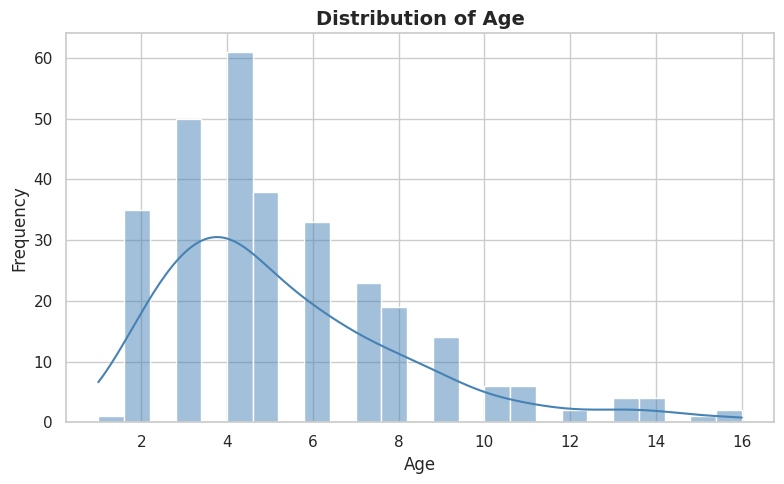

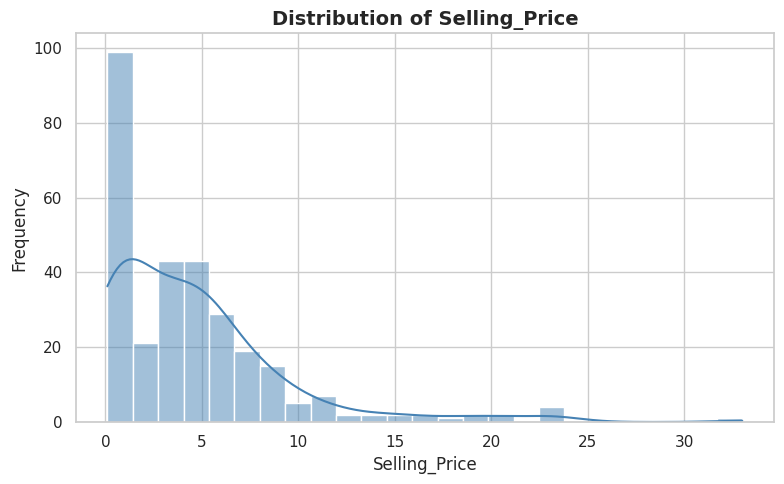

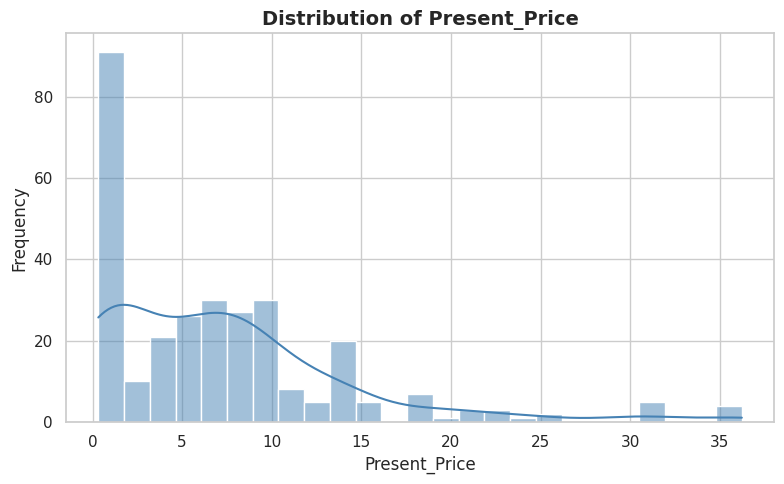

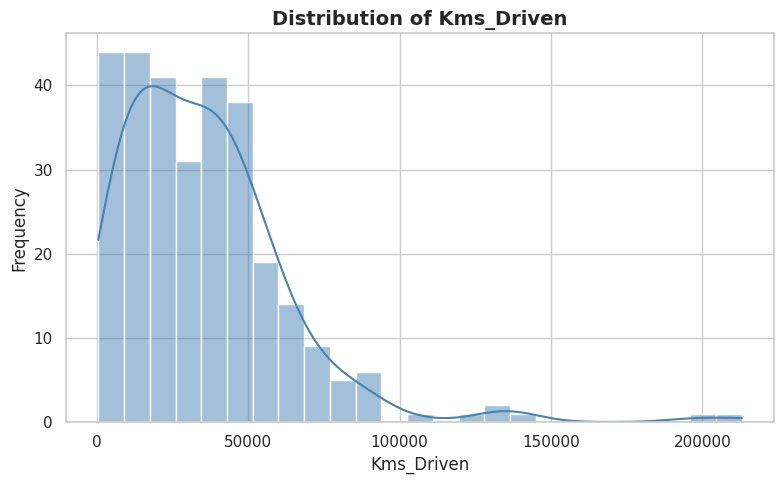

In [13]:
# Set a clean visual style
sns.set(style="whitegrid")

# Plot distributions for each selected column
for col in data_selected.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data_selected[col], kde=True, bins=25, color="steelblue")
    plt.title(f'Distribution of {col}', fontsize=14, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()


### 4. Compute and Plot Correlations Matrix

The code uses `data.corr()` from Pandas to compute the correlation matrix of the DataFrame and then employs `sns.heatmap()` from Seaborn, along with `plt.figure()`, `plt.title()`, and `plt.show()` from Matplotlib, to visualize the correlations as a heatmap.

In [14]:
# Calculate correlation matrix for all features
corr_matrix = data_selected.corr()
# Display the correlation Matrix
corr_matrix

,Age,Selling_Price,Present_Price,Kms_Driven
Age,1.000000,-0.275162,0.014112,0.617777
Selling_Price,-0.275162,1.000000,0.883903,0.062810
Present_Price,0.014112,0.883903,1.000000,0.337736
Kms_Driven,0.617777,0.062810,0.337736,1.000000


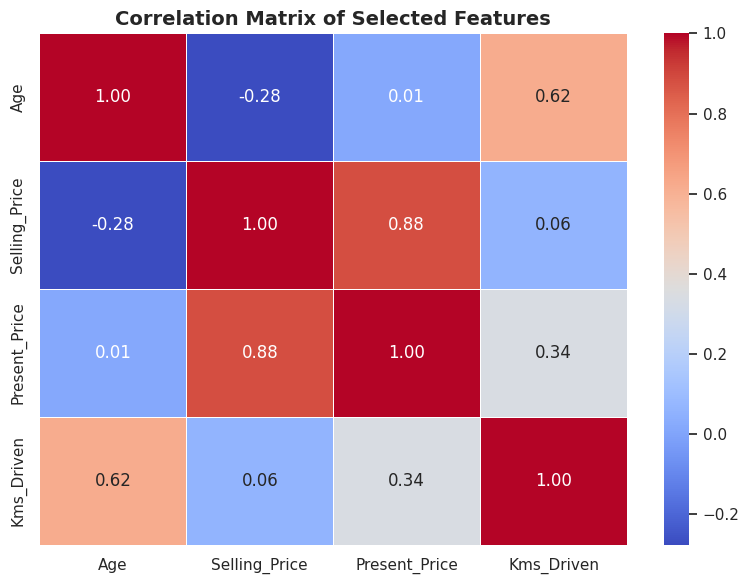

In [15]:
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### 5. Train and Evaluate Linear Regression Model with All Features

The code uses `train_test_split()`, `StandardScaler()`, `LinearRegression()`, `fit()`, `predict()`, `mean_absolute_error()`, `mean_squared_error()`, `np.sqrt()`, and `r2_score()` from Scikit-learn and NumPy to prepare the data, train a linear regression model, make predictions, and evaluate its performance using various metrics (MAE, MSE, RMSE, R2).

In [16]:
# Split data into X and y
X = data_selected[["Age", "Present_Price", "Kms_Driven"]] #all predictors
y = data_selected["Selling_Price"]

In [17]:
# Print the shape of the data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (299, 3)
y shape: (299,)


In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [19]:
# Print the shape of the data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (239, 3)
X_test shape: (60, 3)
y_train shape: (239,)
y_test shape: (60,)


In [20]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [23]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#new line for each value
print("=== Linear Regression with ALL features ===")
print(f"MAE : {mae:.3f}")
print(f"MSE : {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²  : {r2:.3f}")

=== Linear Regression with ALL features ===
MAE : 1.453
MSE : 4.774
RMSE: 2.185
R²  : 0.851


### 6. Train and Evaluate with Highly Correlated Features

In [24]:
# get most correlated features
corr_matrix['Selling_Price'].sort_values(ascending=False)

,Selling_Price
Selling_Price,1.000000
Present_Price,0.883903
Kms_Driven,0.062810
Age,-0.275162


In [25]:
# Drop the columns 'Selling_Price', 'Seller_Type_Individual', 'Fuel_Type_Petrol' as well as 'Transmission_Manual'
X = data.drop(['Selling_Price', 'Seller_Type_Individual', 'Fuel_Type_Petrol', 'Transmission_Manual'], axis=1)

In [26]:
# Select the target value 'Selling_Price'
y = data['Selling_Price']

In [27]:
# Print the shape of the data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (299, 5)
y shape: (299,)


In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
# Print the shape of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")

X_train shape: (239, 5)
X_test  shape: (60, 5)
y_train shape: (239,)
y_test  shape: (60,)


In [30]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [33]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 1.3372913405674791
MSE: 4.198970077598794
RMSE: 2.049138862449003
R2: 0.8686468999336034


7. Train and Evaluate Polynomial Regression Model with Highly Correlated Features:

In [34]:
# Drop the columns 'Selling_Price', 'Seller_Type_Individual', 'Fuel_Type_Petrol' as well as 'Transmission_Manual'
X = data.drop(['Selling_Price', 'Seller_Type_Individual', 'Fuel_Type_Petrol', 'Transmission_Manual'], axis=1)

In [35]:
# Select the target value 'Selling_Price'
y = data['Selling_Price']

In [36]:
# Print the shape of the data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (299, 5)
y shape: (299,)


In [37]:
# Create a PolynomialFeatures object with degree 2
poly_features = PolynomialFeatures(degree=2)

# Transform the data
X_poly = poly_features.fit_transform(X)

In [38]:
# Print the shape of the transformed data
print(f"X_poly shape: {X_poly.shape}")

X_poly shape: (299, 21)


In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

In [40]:
# Print the shape of the data
print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")

X_train shape: (239, 21)
X_test  shape: (60, 21)
y_train shape: (239,)
y_test  shape: (60,)


In [41]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Train Polynomial Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [43]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [44]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.7763541818052146
MSE: 2.0541532130359297
RMSE: 1.4332317373809198
R2: 0.9357415300520749


### 8. Bonus: Good Luck!

In [49]:
# Base features for polynomial regression
X_base = data_selected[["Age", "Present_Price", "Kms_Driven"]]
y = data_selected["Selling_Price"]

In [50]:
results = []

for d in range(1, 6):  # degrees 1 to 5
    # Create polynomial features
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X_base)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_poly, y, test_size=0.2, random_state=42
    )

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append((d, mae, rmse, r2))


In [51]:
df_results = pd.DataFrame(
    results,
    columns=["Degree", "MAE", "RMSE", "R²"]
)

df_results

,Degree,MAE,RMSE,R²
0,1,1.452699,2.184891,0.850667
1,2,0.936622,1.823169,0.896020
2,3,0.933554,1.783853,0.900456
3,4,16.086054,95.302516,-283.122928
4,5,94.707427,629.840396,-12408.622498


### 9. Submit your Notebook

Submit your completed Jupyter notebook file (.ipynb) with all the required code and visualizations named: `group_X_excercise_X.ipynb`